<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [5]:
sac_csv = pd.read_csv('../data/sacramento_real_estate_transactions.csv')

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [7]:
# A:
sac_csv.head()
sac_csv.describe(include = 'all')

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
count,985,985,985.000000,985,985.000000,985.000000,985.000000,985,985,985.000000,985.000000,985.000000
unique,981,39,NaN,2,NaN,NaN,NaN,4,5,NaN,NaN,NaN
top,1223 LAMBERTON CIR,SACRAMENTO,NaN,CA,NaN,NaN,NaN,Residential,Mon May 19 00:00:00 EDT 2008,NaN,NaN,NaN
freq,2,439,NaN,984,NaN,NaN,NaN,917,268,NaN,NaN,NaN
mean,NaN,NaN,95750.697462,NaN,2.911675,1.776650,1312.918782,NaN,NaN,233715.951269,38.445121,-121.193371
std,NaN,NaN,85.176072,NaN,1.307932,0.895371,856.123224,NaN,NaN,139088.818896,5.103637,5.100670
min,NaN,NaN,95603.000000,NaN,0.000000,0.000000,-984.000000,NaN,NaN,-210944.000000,-121.503471,-121.551704
25%,NaN,NaN,95660.000000,NaN,2.000000,1.000000,950.000000,NaN,NaN,145000.000000,38.482704,-121.446119
50%,NaN,NaN,95762.000000,NaN,3.000000,2.000000,1304.000000,NaN,NaN,213750.000000,38.625932,-121.375799
75%,NaN,NaN,95828.000000,NaN,4.000000,2.000000,1718.000000,NaN,NaN,300000.000000,38.695589,-121.294893


In [8]:
corr = sac_csv.corr()

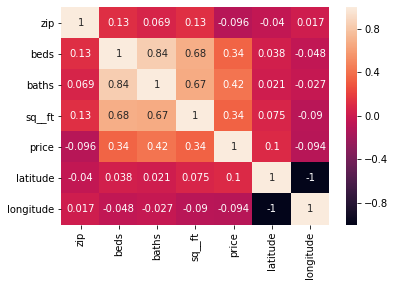

In [10]:
sns.heatmap(corr, annot=True)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

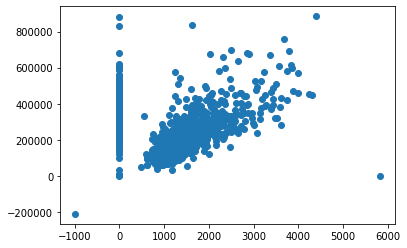

In [13]:
# A
plt.scatter(sac_csv.sq__ft, sac_csv.price)

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [16]:
# A:
from sklearn.linear_model import LinearRegression
def lin_regressor(x,y):
    lr = LinearRegression()
    lr.fit(x,y)
    coefs = lr.coef_
    intercept = lr.intercept_
    return coefs, intercept

### 6. Interpret the intercept. Interpret the slope.

In [15]:
# A:
lin_regressor(sac_csv.price, sac_csv[['sq__ft']])

ValueError: Expected 2D array, got 1D array instead:
array=[  59222   68212   68880   69307   81900   89921   90895   91002   94905
   98937  100309  106250  106852  107502  108750  110700  113263  116250
  120000  121630  122000  122682  123000  124100  125000  126640  127281
  129000  131200  132000  133000  134555  136500  138750  141000  146250
  147308  148750  149593  150000  152000  154000  156896  161250  161500
  164000  165000  166357  166357  168000  170000  173000  174250  174313
  178480  178760  179580  181000  181872  182587  182716  182750  183200
  188741  189000  192067  194000  194818  195000  198000  199500  200000
  200000  206000  208000  212864  221000  221000  223058  227887  231477
  234697  235000  236000  236685  237800  240122  242638  244000  244500
  244960  245918  250000  250000  250134  254200  254200  258000  260000
  260014  263500  265000  265000  271742  273750  275086  280908  280987
  282400  285000  287417  291000  292024  297000  297000  298000  299000
  304037  311000  315537  320000  320000  328360  334150  335750  335750
  339500  344250  346210  347029  347650  351300  352000  370000  370500
  372000  375000  381300  381942  387731  391000  394470  395000  400186
  415000  425000  430000  445000  460000  461000  489332  510000  539000
  585000  600000  606238  660000  830000   69000   70000   71000   78000
   78400   80000   89000   90000   90000   92000   93675   97750   98000
   98000   99000  100000  106716  111000  111000  114800  120108  123225
  123750  125000  125000  126000  129000  134000  135000  135500  140000
  140000  142500  143500  145000  145000  145000  145000  146000  148500
  149000  150000  150000  152000  156000  156000  156000  157788  161653
  161829  165000  168000  169000  175000  176250  179000  180000  180400
  182000  184500  185000  189000  194000  195000  200000  201000  202500
  205000  205000  205000  205000  207000  210000  211500  215000  215000
  215500  222381  225000  225000  225000  225000  228000  229665  230000
  230000  230000  234000  235000  236250  240000  242000  245000  245000
  245000  250000  250000  250000  250000  255000  256054  257729  260000
  261000  261800  264469  265000  270000  270000  270000  270000  275000
  275000  280000  286013  292000  292000  293993  294000  296769  297500
  300000  300000  300000  300000  300500  305000  306500  312500  315000
  319789  330000  330000  331000  334000  336000  339000  339000  345000
  350000  356000  361745  361948  370000  380000  385000  399000  402000
  406026  420000  425000  425000  433500  436746  438700  445000  450000
  460000  460000  460000  465000  471750  480000  484000  485000  495000
  500500  504000  541000  560000  572500  582000  613401  614000  680000
  699000  839000   40000   48000   61500   62050   65000   65000   68000
   68000   77000   82732   84000   84675   85000   90000   90000   91000
   95000   97500  100000  100000  101000  102750  112500  113000  114000
  114000  114750  115000  115000  116100  119250  120000  120000  120000
  120108  121500  121725  122000  123000  125000  125573  126714  126960
  127000  127500  130000  133105  136500  139500  140000  140800  145000
  147000  149600  150000  150000  150000  155000  155435  155500  158000
  158000  160000  160000  164000  164000  165000  167000  167293  167293
  168000  170000  170000  170000  174000  178000  180000  180000  180000
  182000  188325  191500  192000  192700  195000  197654  198000  200345
  203000  207000  208000  210000  212000  213675  213697  215000  215000
  215100  217500  218000  220000  221000  222900  223139  225500  228327
  230000  230000  230522  231200  232000  232500  233641  234000  234500
  235000  236000  236073  238000  238861  239700  240000  240000  241000
  245000  246000  247234  247480  249862  251000  252155  254172  258000
  260000  261000  261000  261000  262500  266000  266000  270000  274425
  274500  275336  277980  280000  284686  284893  285000  285000  285000
  289000  295000  296000  296056  297359  299940  304000  305000  307000
  311328  313138  316630  320000  320000  325000  328578  331000  331500
  340000  344755  345746  351000  353767  355000  356035  360000  360552
  362305  365000  367554  368500  370000  371086  378000  383000  388000
  395100  400000  400000  408431  413000  416767  420000  423000  423000
  427500  430922  445000  450000  452000  470000  471000  475000  484500
  487500  488750  500000  506688  512000  520000  528000  579093  636000
  668365  676200  677048  691659  760000    4897    4897    4897    4897
    4897    4897    4897    4897    4897    4897    4897    4897    4897
    4897    4897    4897    4897    4897    4897    4897    4897    4897
    4897    4897    4897    4897    4897    4897    4897    4897    4897
    4897    4897    4897    4897    4897    4897    4897    4897    4897
    4897    4897    4897    4897    4897    4897    4897    4897    4897
   30000   30000   55422   63000   65000   65000   65000   66500   71000
   75000   77000   85000   95625   96140  104250  105000  108000  109000
  115000  115000  115500  115620  116000  122000  122500  123000  124000
  124000  124413  125000  130000  131750  137721  137760  138000  140000
  145000  145000  150000  150000  151000  155000  155800  156142  158000
  159900  160000  161500  161600  162000  165000  165000  167293  168000
  168000  168750  168750  170000  170250  173000  175000  176095  176250
  178000  179000  180000  180000  180000  181000  182000  182587  185074
  185833  186785  187000  188335  190000  190000  190000  190000  191250
  193000  193500  194818  195000  195000  195000  195000  198000  199900
  200000  201000  204918  205000  205000  205878  207000  207744  209000
  210000 -210944  212500  213750  215000  215000  215000  216033  220000
  220000  220000  220000  220000  220702  221250  222000  222500  222750
  225000  225000  228750  229000  230095  232500  233000  233500  239000
  240000  240000  240971  242000  243450  243500  246544  246750  247000
  247000  249000  249000  250000  250000  250000  252000  255000  255000
  255000  257200  260000  260000  263500  266510  267750  270000  271000
  272700  275000  275000  276000  276500  278000  279000  280000  280000
  285000  288000  289000  290000  290000  293996  294000  294173  295000
  298000  298000  299000  300000  300000  300000  300567  303000  305000
  306000  310000  310000  310000  311518  312000  313000  315000  315000
  315000  315000  315000  320000  322000  325000  325500  326951  328370
  330000  330000  331200  332000  334000  335000  341000  346375  347225
  349000  350000  350000  350000  350000  351000  356200  360000  367463
  375000  380000  380578  386222  389000  390000  395500  396000  397000
  400000  400000  412500  413500  415000  420454  425000  425000  433500
  438000  441000  445000  446000  450000  455000  460000  475000  490000
  493000  508000  511000  525000  533000  545000  560000  575000  575000
  598695  600000  600000  600000  600000  610000  622500  680000  879000
  884790    1551    2000   56950   60000   61000   62000   68566   70000
   80000   85500   92000   93600   95000   97750  104000  105000  107666
  109000  110000  110000  112500  114800  116000  119000  121500  122000
  123675  126854  127059  128687  129500  130000  131750  132000  134000
  134000  138000  142000  143012  145846  147000  148750  150000  150454
  151087  157296  157500  160000  160000  161250  164000  165000  165000
  165750  166000  169000  170000  170000  170000  170000  170725  171750
  172000  173056  174000  174250  176850  179500  185000  188000  188700
  189000  189000  189836  190000  191250  191675  195500  198000  200000
  200000  200000  200100  201528  204750  205000  205000  205900  207000
  207973  208250  208318  209347  211500  212000  213000  216000  216021
  219000  219794  220000  220000  220000  220000  223000  224000  224000
  224252  224500  225000  228000  229027  229500  230000  230000  232425
  234000  235000  235301  235738].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [1]:
# A: